In [1]:
from sonify import sonify
from obspy import UTCDateTime
from cmcrameri import cm
from obspy.clients.filesystem.sds import Client
import pandas as pd
import datetime

In [11]:
t1=UTCDateTime(2024, 6, 21, 16, 0)
t2=UTCDateTime(2024, 6, 21, 23, 0)

In [12]:
c = Client("/Volumes/WembleyData")
st = c.get_waveforms("TS", "WEM02", "00", "*Z", t1, t2)
st.decimate(10)
#st.decimate(2)

1 Trace(s) in Stream:
TS.WEM02.00.CHZ | 2024-06-21T16:00:00.000000Z - 2024-06-21T23:00:00.000000Z | 50.0 Hz, 1260001 samples

In [13]:
st.write("tmp.mseed")

Applying 1-10 Hz bandpass
Saving audio file...
Done
Saving animation. This may take a while...
100.0%
Done
Combining video and audio using ffmpeg...
Video saved as /Users/sph1r17/RESEARCH_PROJECTS/SWIFT/TS_WEM02_CHZ_250x.mp4


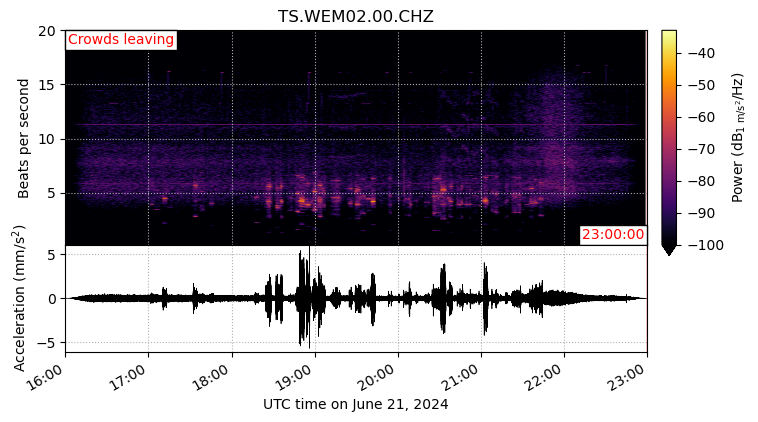

In [15]:
sonify(
    file="tmp.mseed",
    inventory="/Users/sph1r17/Downloads/TS.xml",
    starttime=t1,
    endtime=t2,
    freqmin=1,
    freqmax=10,
    freqmin_plot=0.2,
    freqmax_plot=20,
    #speed_up_factor=200,
    speed_up_factor=250,
    fps=5,  # Use fps=60 to fully recreate the JHEPC entry (slow to save!)
    spec_win_dur=80,
    db_lim=(-100, -33),
    cmap="inferno",
    volume=80,
)

In [34]:
df = pd.read_csv("/Users/sph1r17/Downloads/songs_times_25_June.dat")
df

,Song name,Starttime,Endtime
0,Miss Americana & The Heartbreak Prince,2024-06-21T19:24:00.000Z,2024-06-21T19:27:00.000Z
1,Cruel Summer,2024-06-21T19:27:00.000Z,2024-06-21T19:31:00.000Z
2,The Man,2024-06-21T19:31:00.000Z,2024-06-21T19:34:00.000Z
3,You Need To Calm Down,2024-06-21T19:34:00.000Z,2024-06-21T19:39:00.000Z
4,Lover,2024-06-21T19:39:00.000Z,2024-06-21T19:46:00.000Z
...,...,...,...
68,Standing Ovation,2024-06-23T20:07:00.000Z,2024-06-23T20:10:00.000Z
69,Shake It Off,2024-06-23T20:36:00.000Z,2024-06-23T20:42:00.000Z
70,Bad Blood,2024-06-23T20:42:00.000Z,2024-06-23T21:05:00.000Z
71,Travis Kelce,2024-06-23T21:05:00.000Z,2024-06-23T21:49:00.000Z


In [36]:
df["Starttime"] = pd.to_datetime(df["Starttime"])
df["Endtime"] = pd.to_datetime(df["Endtime"])

df["Starttime"] -= datetime.timedelta(hours=1)
df["Endtime"] -= datetime.timedelta(hours=1)

In [37]:
df

,Song name,Starttime,Endtime
0,Miss Americana & The Heartbreak Prince,2024-06-21 18:24:00+00:00,2024-06-21 18:27:00+00:00
1,Cruel Summer,2024-06-21 18:27:00+00:00,2024-06-21 18:31:00+00:00
2,The Man,2024-06-21 18:31:00+00:00,2024-06-21 18:34:00+00:00
3,You Need To Calm Down,2024-06-21 18:34:00+00:00,2024-06-21 18:39:00+00:00
4,Lover,2024-06-21 18:39:00+00:00,2024-06-21 18:46:00+00:00
...,...,...,...
68,Standing Ovation,2024-06-23 19:07:00+00:00,2024-06-23 19:10:00+00:00
69,Shake It Off,2024-06-23 19:36:00+00:00,2024-06-23 19:42:00+00:00
70,Bad Blood,2024-06-23 19:42:00+00:00,2024-06-23 20:05:00+00:00
71,Travis Kelce,2024-06-23 20:05:00+00:00,2024-06-23 20:49:00+00:00


In [15]:
df.columns

Index(['Song name', '                                           Starttime',
       '                           Endtime'],
      dtype='object')